# Benchmarking distributed training of InceptionV3 in TensorFlow 1.1.0

Measurements available at: https://docs.google.com/spreadsheets/d/1u4LlBYWodwVQqO45LMiJbNRXzcGnmpnfX-vDyfFkgAA/edit?usp=sharing

Google's results available at: https://www.tensorflow.org/performance/benchmarks

In [1]:
import sys
sys.path.append('plots/')


import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib2tikz import save as tikz_save
%matplotlib inline

import plotting

%load_ext autoreload
%autoreload 2

In [2]:
def get_speedups(images_sec):
    images_sec1 = images_sec[0]
    return [v/images_sec1 for v in images_sec]

## Training with NVIDIA® Tesla® P100

Google provides results only for a single NVIDIA DGX-1, hence allowing comparisons up to 8 GPUs with Piz Daint.

DGX-1 features eight Tesla P100 GPU accelerators connected through NVLink (the NVIDIA high-performance GPU interconnect) in a hybrid cube-mesh network. 
Together with dual socket Intel Xeon CPUs and four 100 Gb InfiniBand network interface cards.

Piz Daint is a hybrid Cray XC40/XC50 supercomputer at CSCS.
The system has Aries routing and communications ASIC, with Dragonfly network topology.
At the time of writing, it is the third most powerful supercomputer in the world and in the top ten of the most energy-efficient supercomputers.
Each node that we use in Piz Daint is equipped with an NVIDIA Tesla P100.

In [3]:
machines = ['Google NVIDIA DGX-1', 'CSCS Piz Daint']
synthetic_google = [142, 284, 569, 1131]
synthetic_daint = [138.23, 264.57, 523.38, 1018.18]

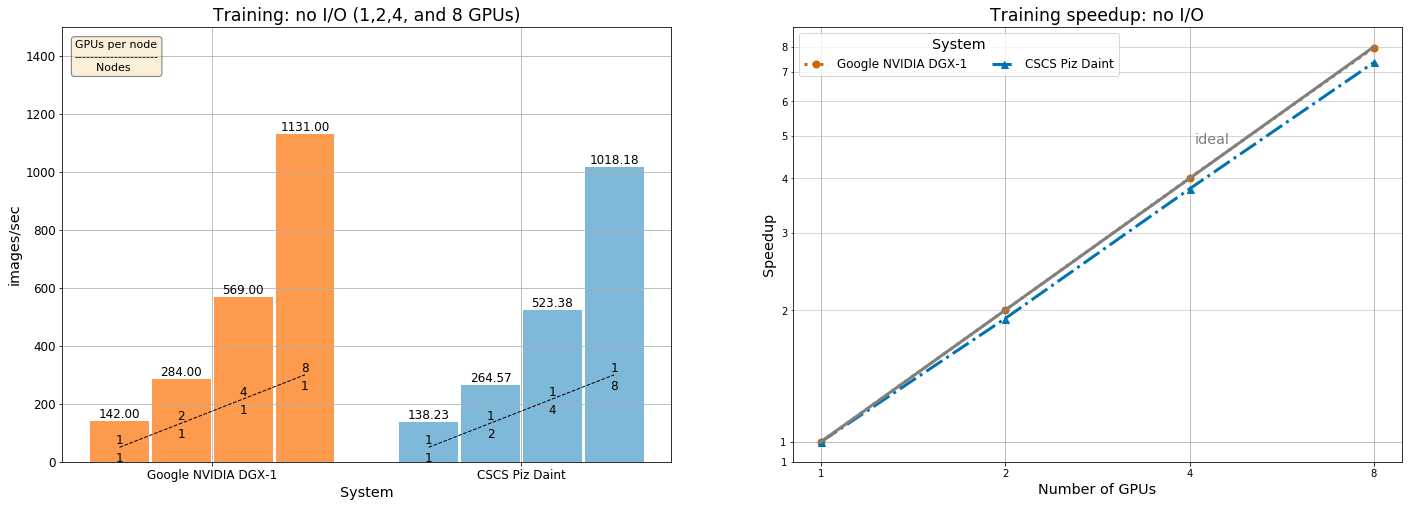

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

plotting.plot_tts_bar(machines, [synthetic_google, synthetic_daint], ax1, 
                      width=0.2, ymax=1500,
                      title='Training: no I/O (1,2,4, and 8 GPUs)',
                      xlabel='System', ylabel='images/sec', 
                      cmap_name=['Oranges', 'Blues'], cmap_min_grad=0.45, cmap_max_grad=0.45)

textstr = 'GPUs per node\n---------------------\n      Nodes'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.02, 0.97, textstr, transform=ax1.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
# Google
mx = 1
mmx = 1.6
my = 50
mmy = 300
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,4)
ys=np.linspace(my,mmy,4)
for i, y in enumerate(ys):
    # GPUs per node
    ax1.text(xs[i], y+max(max([synthetic_google, synthetic_daint]))/100, 
             str("%i" % (2**i)), fontsize='large', horizontalalignment='center')
    # Nodes
    ax1.text(xs[i], y-4.5*max(max([synthetic_google, synthetic_daint]))/100, 
             str("%i" % 1), fontsize='large', horizontalalignment='center')
# CSCS
mx = 2
mmx = 2.6
my = 50
mmy = 300
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,4)
ys=np.linspace(my,mmy,4)
for i, y in enumerate(ys):
    # GPUs per node
    ax1.text(xs[i], y+max(max([synthetic_google, synthetic_daint]))/100, 
             str("%i" % 1), fontsize='large', horizontalalignment='center')
    # Nodes
    ax1.text(xs[i], y-4.5*max(max([synthetic_google, synthetic_daint]))/100, 
             str("%i" % (2**i)), fontsize='large', horizontalalignment='center')
    

plotting.plot_speedup([1,2,4,8], [get_speedups(synthetic_google), get_speedups(synthetic_daint)], ax2,
                      title='Training speedup: no I/O', xlabel='Number of GPUs',
                      labels=machines, legend_title='System',
                      cmap_name=[plotting.colorblind_palette_dict['vermillion'],
                                 plotting.colorblind_palette_dict['blue']])

f.savefig('plots/google-daint-synthetic.png')
f.savefig('plots/google-daint-synthetic.svg')

In [5]:
# Scalability efficiency
print(np.divide(get_speedups(synthetic_google),[1, 2, 4, 8]))
print(np.divide(get_speedups(synthetic_daint),[1, 2, 4, 8]))

[ 1.          1.          1.00176056  0.99559859]
[ 1.          0.95699197  0.94657455  0.92072994]


Here, we can see that the peak performance of Piz Daint is close to the one achieved by an NVIDIA DGX-1, even though multiple nodes are used in Piz Daint.
Specifically, with eight GPUs, while Google reports a speedup efficiency of 99.56%, we report a speedup efficiency of 92.07% on Piz Daint.

## Training with NVIDIA® Tesla® K80

### Up to 8 GPUs

In [6]:
machines = ['p2.8xlarge run by Google', 'p2.8xlarge run by CSCS', 'p2.xlarge run by CSCS']
google8_synthetic = [30, 58, 116, 227]
our8_synthetic = [30.55, 58.378, 116.338, 230.748]
our1_synthetic = [30.55, 57.448, 114.5678, 228.41]

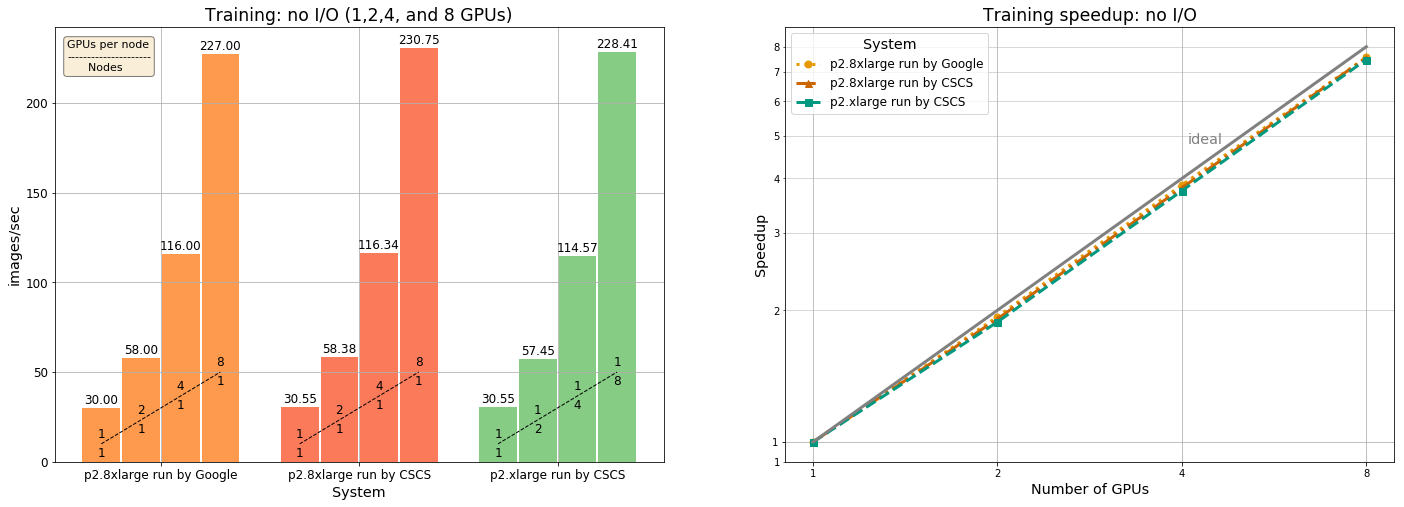

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

plotting.plot_tts_bar(machines, [google8_synthetic, our8_synthetic, our1_synthetic], ax1, 
                      width=0.2,
                      title='Training: no I/O (1,2,4, and 8 GPUs)',
                      xlabel='System', ylabel='images/sec', 
                      cmap_name=['Oranges', 'Reds', 'Greens'], cmap_min_grad=0.45, cmap_max_grad=0.45)

textstr = 'GPUs per node\n---------------------\n      Nodes'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.02, 0.97, textstr, transform=ax1.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
# Google
mx = 1
mmx = 1.6
my = 10
mmy = 50
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,4)
ys=np.linspace(my,mmy,4)
for i, y in enumerate(ys):
    # GPUs per node
    ax1.text(xs[i], y+1.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
             str("%i" % (2**i)), fontsize='large', horizontalalignment='center')
    # Nodes
    ax1.text(xs[i], y-3*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
             str("%i" % 1), fontsize='large', horizontalalignment='center')
# CSCS p2.8
mx = 2
mmx = 2.6
my = 10
mmy = 50
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,4)
ys=np.linspace(my,mmy,4)
for i, y in enumerate(ys):
    # GPUs per node
    ax1.text(xs[i], y+1.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
             str("%i" % (2**i)), fontsize='large', horizontalalignment='center')
    # Nodes
    ax1.text(xs[i], y-3*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
             str("%i" % 1), fontsize='large', horizontalalignment='center')
# CSCS
mx = 3
mmx = 3.6
my = 10
mmy = 50
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,4)
ys=np.linspace(my,mmy,4)
for i, y in enumerate(ys):
    # GPUs per node
    ax1.text(xs[i], y+1.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
             str("%i" % 1), fontsize='large', horizontalalignment='center')
    # Nodes
    ax1.text(xs[i], y-3*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
             str("%i" % (2**i)), fontsize='large', horizontalalignment='center')


plotting.plot_speedup([1,2,4,8], 
                      [get_speedups(google8_synthetic),get_speedups(our8_synthetic),get_speedups(our1_synthetic)], 
                      ax2, title='Training speedup: no I/O', xlabel='Number of GPUs',
                      labels=machines, legend_title='System',
                      cmap_name=[plotting.colorblind_palette_dict['orange'],
                                 plotting.colorblind_palette_dict['vermillion'],
                                 plotting.colorblind_palette_dict['bluish_green']])

f.savefig('plots/google-our-aws-synthetic.png')
f.savefig('plots/google-our-aws-synthetic.svg')

In [8]:
# Scalability efficiency
print(np.divide(get_speedups(google8_synthetic),[1, 2, 4, 8]))
print(np.divide(get_speedups(our8_synthetic),[1, 2, 4, 8]))
print(np.divide(get_speedups(our1_synthetic),[1, 2, 4, 8]))

[ 1.          0.96666667  0.96666667  0.94583333]
[ 1.          0.95545008  0.95202946  0.94414075]
[ 1.          0.94022913  0.93754337  0.93457447]


Google provides results that achieve a scalability efficiency of 94.58% with 8 GPUs on a *p2.8xlarge*, and, similarly, our measurements show an efficiency of 94.44% on the same machine.

We also ran tests on *p2.xlarge* instances (having 1 GPU per node), showing that comparable performance (93.45% scalability efficiency) can be obtained with eight nodes (eight GPUs).

Hence, we can infer that the application is compute bounded when up to eight GPUs are used because we achieve the same performance with eight nodes as with a single node having eight GPUs regardless of the underlying network (Piz Daint or AWS).

### Up to 64 GPUs

In [9]:
machines = ['p2.8xlarge run by Google', 'p2.8xlarge run by CSCS', 'p2.xlarge run by CSCS']
google8_synthetic = [30, 229, 459, 902, 1783]
our8_synthetic = [30.55, 230.748, 448.574, 863.723, 1731.309]
our1_synthetic = [30.55, 228.41, 431.645, 825.638, 996.3205]

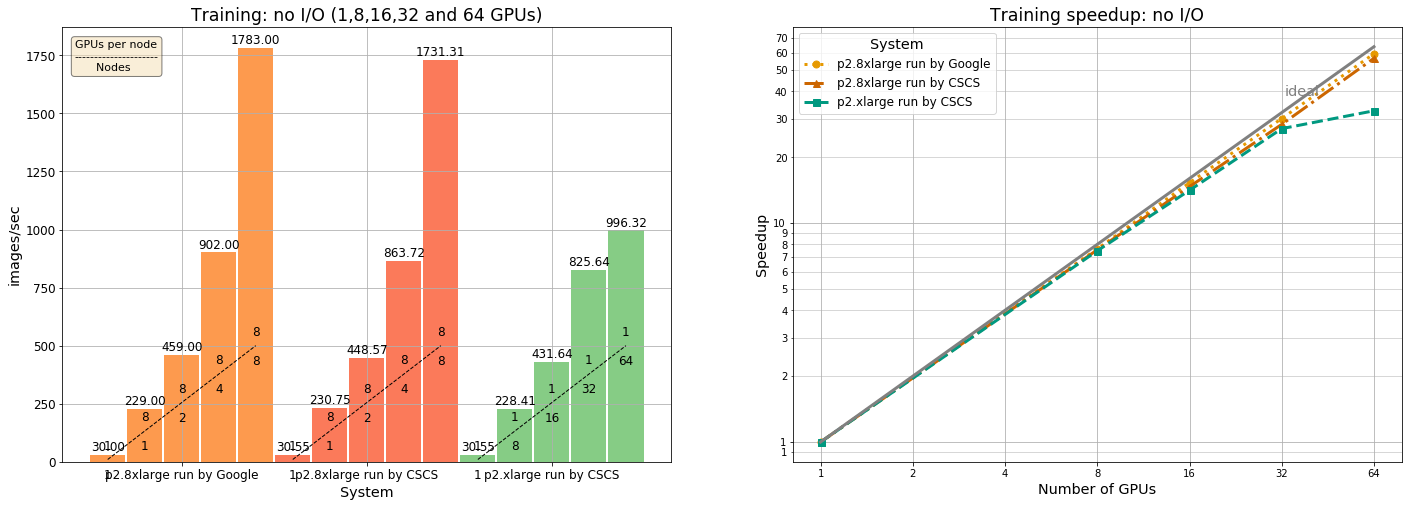

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

plotting.plot_tts_bar(machines, [google8_synthetic, our8_synthetic, our1_synthetic], ax1, 
                      width=0.2,
                      title='Training: no I/O (1,8,16,32 and 64 GPUs)',
                      xlabel='System', ylabel='images/sec', 
                      cmap_name=['Oranges', 'Reds', 'Greens'], cmap_min_grad=0.45, cmap_max_grad=0.45)

textstr = 'GPUs per node\n---------------------\n      Nodes'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.02, 0.97, textstr, transform=ax1.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
# Google
mx = 1
mmx = 1.8
my = 10
mmy = 500
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,5)
ys=np.linspace(my,mmy,5)
for i, y in enumerate(ys):
    if i == 0:
        # GPUs per node
        ax1.text(xs[0], ys[0]+2.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
        # Nodes
        ax1.text(xs[0], ys[0]-4.7*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
    else:
        # GPUs per node
        ax1.text(xs[i], y+2.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 8), fontsize='large', horizontalalignment='center')
        # Nodes
        ax1.text(xs[i], y-4.7*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % (2**(2+i)/8)), fontsize='large', horizontalalignment='center')

# CSCS p2.8
mx = 2
mmx = 2.8
my = 10
mmy = 500
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,5)
ys=np.linspace(my,mmy,5)
for i, y in enumerate(ys):
    if i == 0:
        # GPUs per node
        ax1.text(xs[0], ys[0]+2.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
        # Nodes
        ax1.text(xs[0], ys[0]-4.7*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
    else:
        # GPUs per node
        ax1.text(xs[i], y+2.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 8), fontsize='large', horizontalalignment='center')
        # Nodes
        ax1.text(xs[i], y-4.7*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % (2**(2+i)/8)), fontsize='large', horizontalalignment='center')
# CSCS p2
mx = 3
mmx = 3.8
my = 10
mmy = 500
ax1.plot([mx, mmx], [my, mmy], 'k--', lw=1)
xs=np.linspace(mx,mmx,5)
ys=np.linspace(my,mmy,5)
for i, y in enumerate(ys):
    if i == 0:
        # GPUs per node
        ax1.text(xs[i], y+2.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
        # Nodes
        ax1.text(xs[i], y-4.7*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
    else:
        # GPUs per node
        ax1.text(xs[i], y+2.5*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % 1), fontsize='large', horizontalalignment='center')
        # Nodes
        ax1.text(xs[i], y-4.7*max(max([google8_synthetic, our8_synthetic, our1_synthetic]))/100, 
                 str("%i" % (2**(2+i))), fontsize='large', horizontalalignment='center')


plotting.plot_speedup([1,8,16,32,64], 
                      [get_speedups(google8_synthetic),get_speedups(our8_synthetic),get_speedups(our1_synthetic)], 
                      ax2, title='Training speedup: no I/O', xlabel='Number of GPUs',
                      labels=machines, legend_title='System',
                      cmap_name=[plotting.colorblind_palette_dict['orange'],
                                 plotting.colorblind_palette_dict['vermillion'],
                                 plotting.colorblind_palette_dict['bluish_green']])

f.savefig('plots/google-our-dist-aws-synthetic.png')
f.savefig('plots/google-our-dist-aws-synthetic.svg')

In [11]:
# Scalability efficiency
print(np.divide(get_speedups(google8_synthetic),[1,8,16,32,64]))
print(np.divide(get_speedups(our8_synthetic),[1,8,16,32,64]))
print(np.divide(get_speedups(our1_synthetic), [1,8,16,32,64]))

[ 1.          0.95416667  0.95625     0.93958333  0.92864583]
[ 1.          0.94414075  0.91770458  0.88351371  0.88548946]
[ 1.          0.93457447  0.88307079  0.84455606  0.50957472]


An interesting finding is that up to 16 GPUs, *p2.xlarge* and *p2.8xlarge* systems have close performance: We report 88.31% for the former and 91.77% for the latter.

Moreover, even though 32 nodes are required for a *p2.xlarge* system to use 32 GPUs, it still achieves a scalability efficiency greater than 80%. <br>
Specifically, we report 88.35% efficiency for a four-node *p2.8xlarge* system and 84.45% efficiency for a thirty-two-node *p2.xlarge* system.

However, once a cluster of sixty-four *p2.xlarge* nodes is employed, the scalability efficiency stops at *50.96%*, while a cluster of eight *p2.8xlarge* still exhibits 88.55% efficiency from our measurements and 92.86% from Google's ones.

This is probably due to the fact that the network capacity is not sufficient anymore for the amount of traffic generated by all the nodes in the *p2.xlarge* cluster.

## Distributed training on Piz Daint

In [12]:
machines = [1, 2, 4, 8, 16, 32, 64, 128]
synthetic_daint = [138.23, 264.57, 523.38, 1018.18, 2001.00, 3840.35, 7118.31, 9219.70]
real_daint = [137.03, 260.84, 516.707, 911.839, 1772.34, 3425.546, 6348.74, 9055.64]

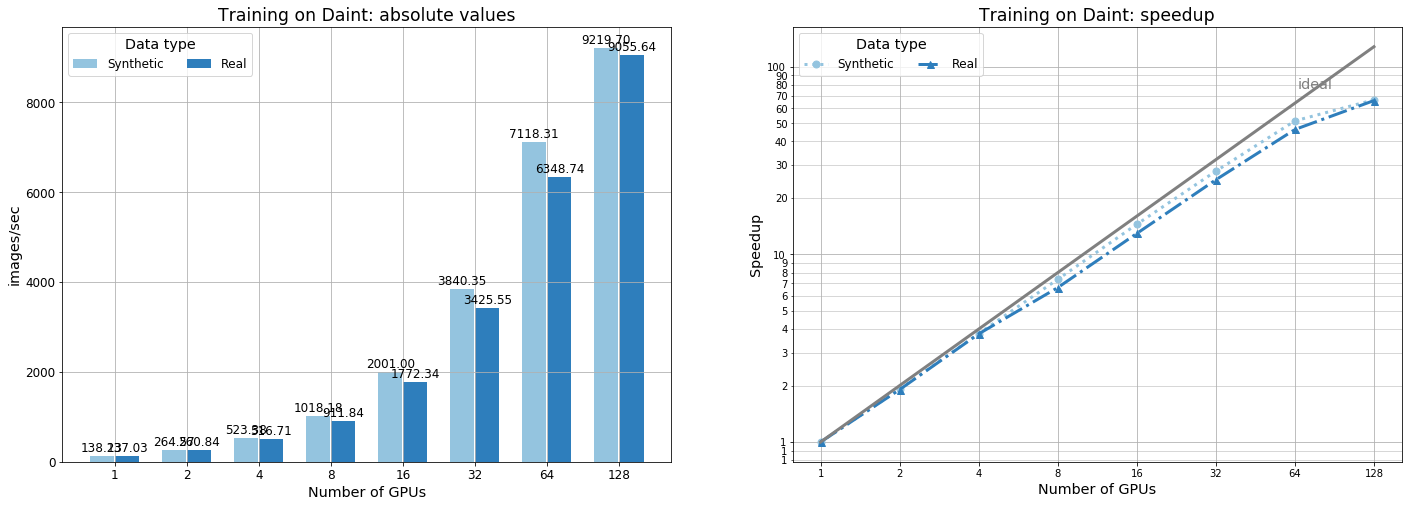

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

plotting.plot_tts_bar(machines, list(zip(synthetic_daint, real_daint)), ax1, 
                      title='Training on Daint: absolute values', 
                      legend_title='Data type', labels=['Synthetic', 'Real'], legend_loc='upper left',
                      xlabel='Number of GPUs', ylabel='images/sec', 
                      cmap_name='Blues', cmap_min_grad=0.4, cmap_max_grad=0.7)

plotting.plot_speedup(machines, [get_speedups(synthetic_daint), get_speedups(real_daint)], ax2,
                      legend_title='Data type', labels=['Synthetic', 'Real'], legend_loc='upper left',
                      title='Training on Daint: speedup', xlabel='Number of GPUs',
                      cmap_name='Blues', cmap_min_grad=0.4, cmap_max_grad=0.7)

f.savefig('plots/daint-synthetic-real.png')
f.savefig('plots/daint-synthetic-real.svg')

In [14]:
# Scalability efficiency
print(np.divide(get_speedups(synthetic_daint), machines))
print(np.divide(get_speedups(real_daint), machines))

[ 1.          0.95699197  0.94657455  0.92072994  0.9047421   0.86819748
  0.80462703  0.52108013]
[ 1.          0.95176239  0.94268956  0.83178775  0.80837225  0.78120348
  0.72392223  0.51628977]


Piz Daint's scalability efficiency drastically drops when 128 nodes are used.

We think this is due to having reached the inter-node network capacity because of the largely increased amount of data sent between Workers and Parameter Servers.

## Distributed training on Amazon p2.xlarge

In [15]:
machines = [1, 2, 4, 8, 16, 32, 64, 128]
synthetic_p2 = [30.55, 57.448, 114.5678, 228.41, 431.645, 825.638, 996.3205, 1077.59125]
real_p2 = [30.04, 56.94, 113.03, 224.06, 431.307, 734.97, 986.9066, 1080.1246]

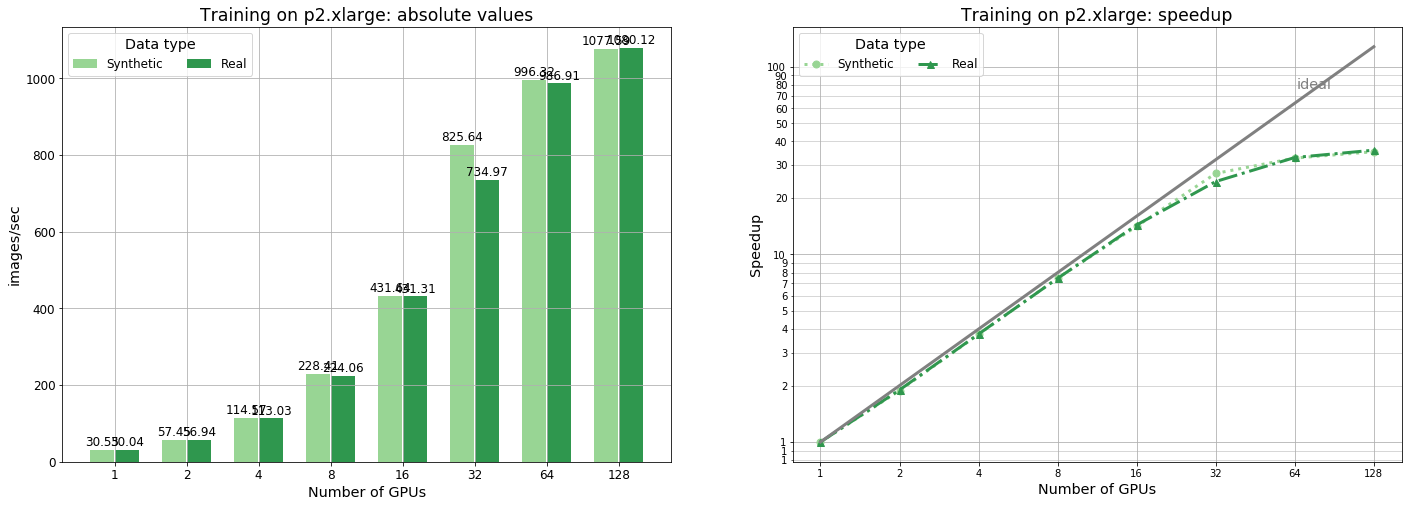

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

plotting.plot_tts_bar(machines, list(zip(synthetic_p2, real_p2)), ax1, 
                      title='Training on p2.xlarge: absolute values', 
                      legend_title='Data type', labels=['Synthetic', 'Real'], legend_loc='upper left',
                      xlabel='Number of GPUs', ylabel='images/sec', 
                      cmap_name='Greens', cmap_min_grad=0.4, cmap_max_grad=0.7)
plotting.plot_speedup(machines, [get_speedups(synthetic_p2), get_speedups(real_p2)], ax2,
                      legend_title='Data type', labels=['Synthetic', 'Real'], legend_loc='upper left',
                      title='Training on p2.xlarge: speedup', xlabel='Number of GPUs',
                      cmap_name='Greens', cmap_min_grad=0.4, cmap_max_grad=0.7)

f.savefig('plots/p2-synthetic-real.png')
f.savefig('plots/p2-synthetic-real.svg')

In [17]:
# Scalability efficiency
print(np.divide(get_speedups(synthetic_p2), machines))
print(np.divide(get_speedups(real_p2), machines))

[ 1.          0.94022913  0.93754337  0.93457447  0.88307079  0.84455606
  0.50957472  0.27557059]
[ 1.          0.94773635  0.94066245  0.93234021  0.89735977  0.76457432
  0.51332941  0.2809079 ]


In this plot, we can see that *p2.xlarge*'s scalability efficiency diminishes only when 64 nodes are benchmarked.

This system has single-GPU nodes like Piz Daint but it stops scaling out efficiently for a smaller number of nodes.
The main difference amongst them is their inter-node network (Piz Daint's being faster), providing additional support to our belief of inter-node network bottleneck for Piz Daint and *p2.xlarge* systems.

## Distributed training on Amazon p2.8xlarge

In [18]:
machines = [1, 2, 4, 8, 16, 32, 64, 128]
synthetic_p28 = [30.55, 58.378, 116.338, 230.748, 448.574, 863.723, 1731.309, 3333.196]
real_p28 = [30.04, 58.234, 115.56, 190.024, 387.674, 717.4942, 1430.2846, 2832.8334]

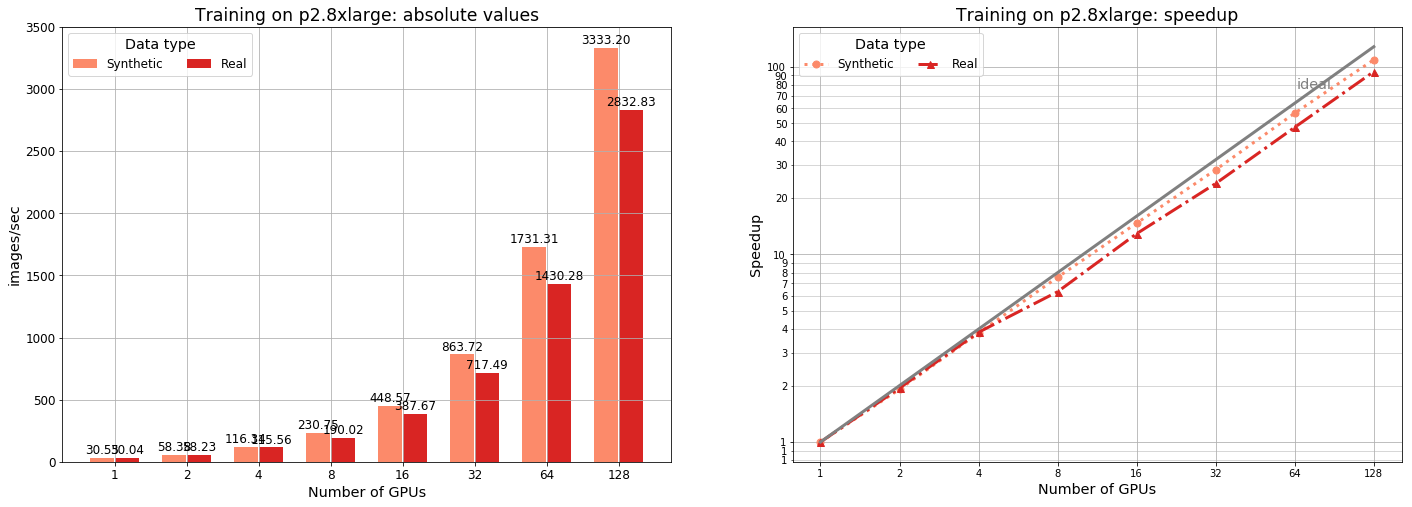

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

plotting.plot_tts_bar(machines, list(zip(synthetic_p28, real_p28)), ax1, 
                      title='Training on p2.8xlarge: absolute values', 
                      legend_title='Data type', labels=['Synthetic', 'Real'], legend_loc='upper left',
                      xlabel='Number of GPUs', ylabel='images/sec', 
                      cmap_name='Reds', cmap_min_grad=0.4, cmap_max_grad=0.7)
plotting.plot_speedup(machines, [get_speedups(synthetic_p28), get_speedups(real_p28)], ax2,
                      legend_title='Data type', labels=['Synthetic', 'Real'], legend_loc='upper left',
                      title='Training on p2.8xlarge: speedup', xlabel='Number of GPUs',
                      cmap_name='Reds', cmap_min_grad=0.4, cmap_max_grad=0.7)

f.savefig('plots/p28-synthetic-real.png')
f.savefig('plots/p28-synthetic-real.svg')

In [20]:
# Scalability efficiency
print(np.divide(get_speedups(synthetic_p28), machines))
print(np.divide(get_speedups(real_p28), machines))

[ 1.          0.95545008  0.95202946  0.94414075  0.91770458  0.88351371
  0.88548946  0.85239259]
[ 1.          0.9692743   0.96171771  0.79071238  0.80657873  0.7463946
  0.74394797  0.73673472]


This plot does not show any evident reduction in scalability as the number of GPUs is increased.

In such system, Workers aggregate their updates before sending them to the PSs. 
Hence, the traffic generated when 128 GPUs are used here is comparable to the one generated by a system of sixteen single-GPU nodes.

## I/O overhead

Relative overhead (in percentage) due to I/O access for each setting:

$$I/O~overhead~_{System}^{N\_GPUs} = \dfrac{Img/s\_Synthetic_{System}^{N\_GPUs} - Img/s\_Real_{System}^{N\_GPUs}}{Img/s\_Synthetic_{System}^{N\_GPUs}} \times 100$$

In [21]:
def io_overhead(synth, real):
    return [max(0,(synth[i]-real[i]))/synth[i]*100 for i in range(len(synth))]
    
machines = [1, 2, 4, 8, 16, 32, 64, 128]
o_daint = io_overhead(synthetic_daint, real_daint)
o_p28 = io_overhead(synthetic_p28, real_p28)
o_p2 = io_overhead(synthetic_p2, real_p2)

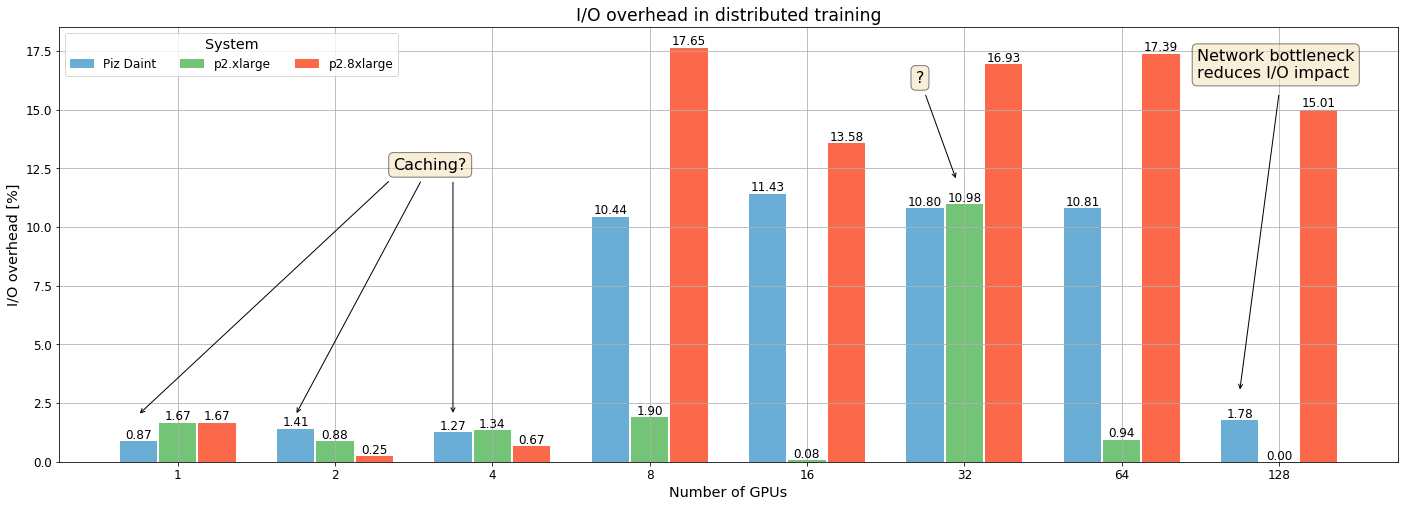

In [22]:
values_lists = [o_daint, o_p2, o_p28]

f, ax = plt.subplots(1, figsize=(24,8))
width=0.25
ax.grid()
# colormap
n_machines = len(machines)
n_labels = 1
labels = ['Piz Daint', 'p2.xlarge', 'p2.8xlarge']
bar_colors = []
cmap_name = ['Blues', 'Greens', 'Reds']
for cmap_ in cmap_name[::-1]:
    cmap = plt.get_cmap(cmap_)
    bar_colors.insert(0, cmap(np.linspace(0.5, 0.5, n_labels)))
# plot bars -- label by label
x_values = np.arange(1, n_machines+1)
max_value = max(max(values_lists))
bars = []
for i,values in enumerate(values_lists):
    b = ax.bar(x_values+i*width, values, 0.95*width, align='center', color=bar_colors[i])
    bars.append(b)
    for idx, v in enumerate(values):
        ax.text(idx+1+i*width, v+max_value/100, str("%.2f"%v), fontsize='large', horizontalalignment='center')
# axes
ax.set_xticks(x_values+2*width/2)
ax.set_xticklabels(machines)
ax.set_xlabel('Number of GPUs', fontsize='x-large')
ax.set_ylabel('I/O overhead [%]', fontsize='x-large')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize('large')
#legend
legend = ax.legend((bars[0][0], bars[1][0], bars[2][0]), labels,
                   loc='upper left', ncol=3, shadow=False, fancybox=True,
                   title='System', fontsize='large')
plt.setp(legend.get_title(),fontsize='x-large')

ax.set_title('I/O overhead in distributed training', fontsize='xx-large')


# Annotations
textstr = 'Caching?'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.25, 0.7, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax.annotate("", xy=(1, 2), xytext=(2.6, 12), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(2, 2), xytext=(2.8, 12), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(3, 2), xytext=(3, 12), arrowprops=dict(arrowstyle="->"))

textstr = '?'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.64, 0.9, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax.annotate("", xy=(6.2, 12), xytext=(6, 15.7), arrowprops=dict(arrowstyle="->"))

textstr = 'Network bottleneck\nreduces I/O impact'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.85, 0.95, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax.annotate("", xy=(8, 3), xytext=(8.25, 15.7), arrowprops=dict(arrowstyle="->"))


f.savefig('plots/io-synthetic-real.png')
f.savefig('plots/io-synthetic-real.svg')

The first thing we observe from this plot is that when 8 GPUs per node are used in a *p2.8xlarge* cluster, where each node loads data from a local SSD, a constant I/O overhead of around 17% is present (due to PCIe traffic).

Looking at *p2.xlarge* clusters, instead, we see that I/O access does not add any overhead, apart when thirty-two nodes are used.
However, this still comes at the expenses of replicating the data at each node.

Focusing on Piz Daint at last, we see that around $11\%$ of I/O overhead is present when eight to sixty-four nodes are used. <br>
On the other hand, this is not shown when less nodes are employed.
The reason might be due to caching mechanisms in the system. <br>
The I/O overhead drops down once more for one hundred and twenty-eight nodes.
In this case, the reason of this reduction may be found in the predominance of the inter-node network bottleneck, which makes the impact of I/O access negligible.

TensorFlow communication patterns should be profiled to verify all our intuitions.